In [275]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [276]:
dataset = []
x = np.linspace(1, 50, 500)
for i in x:
    eps = random.normal(0, 0.2)
    dataset.append(0.5 * i + 1 + eps)

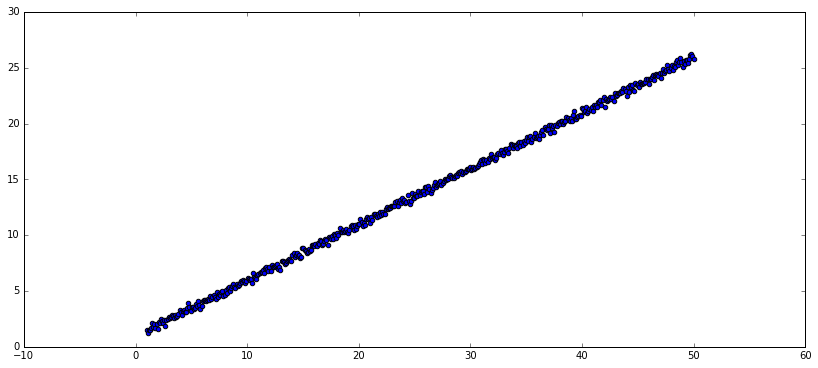

In [277]:
plt.figure(figsize=(14,6))
plt.scatter(x, dataset)
plt.show()

In [278]:
from scipy import optimize
from math import *

In [279]:
def MAE(k, data, x):
    sum_abs = 0
    for i in range(len(data)):
        sum_abs += abs(k[0] * x[i] + k[1] - data[i])
    return sum_abs / len(data)

In [280]:
def MSE(k, data, x):
    sum_sq = 0
    for i in range(len(data)):
        sum_sq += (k[0] * x[i] + k[1] - data[i]) ** 2
    return sum_sq / len(data)

Найдем оптимальные параметры

In [281]:
parameters = [1, 1]
optim_param = optimize.minimize(MSE, parameters, args = (dataset, x))

Визуализируем восстановленную прямую

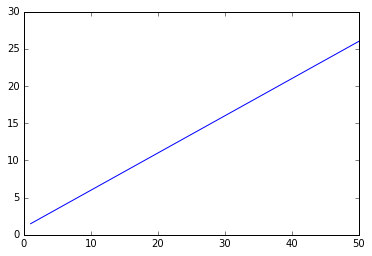

In [282]:
plt.plot(x, x * optim_param.x[0] + optim_param.x[1])
plt.show()

Построим на одном графике восстановленую прямую и нашу выборку

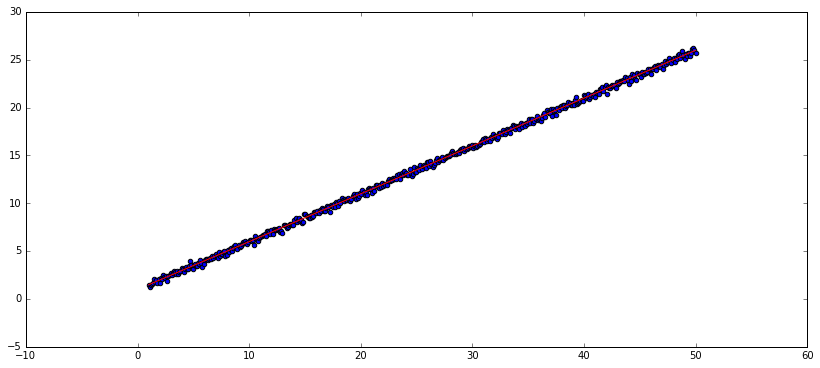

In [283]:
plt.figure(figsize=(14, 6))
plt.plot(x, x * optim_param.x[0] + optim_param.x[1], color = "r")
plt.scatter(x, dataset)
plt.show()

Добавим в выборку еще 75 точек

In [284]:
x_2 = np.linspace(1, 50, 75)
x = list(x)
for i in x_2:
    eps = random.normal(0, 0.2)
    x.append(i)
    dataset.append(-i + eps)

Найдем оптимальные параметры, минимизируя MSE

In [285]:
parameters = [1, 1]
optim_param_MSE = optimize.minimize(MSE, parameters, args = (dataset, x))

Найдем оптимальные параметры, минимизируя MAE

In [286]:
parameters = [1, 1]
optim_param_MAE = optimize.minimize(MAE, parameters, args = (dataset, x))

На одном графике построим восстановленные прямые и нашу выборку

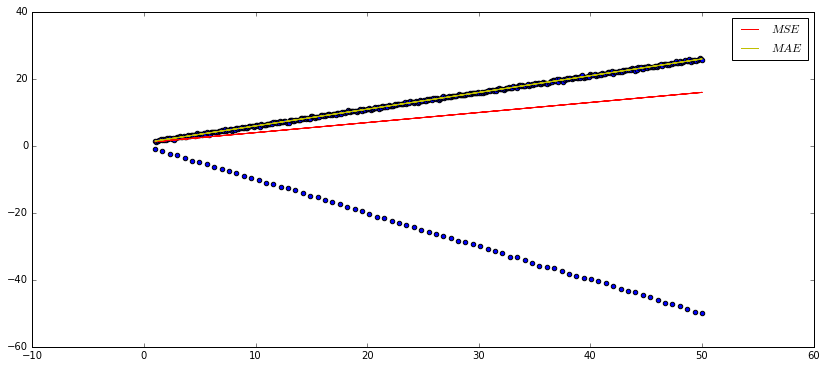

In [287]:
plt.figure(figsize=(14, 6))
x = numpy.array(x)
plt.plot(x, x * optim_param_MSE.x[0] + optim_param_MSE.x[1], color = "r", label = "$MSE$")
plt.plot(x, x * optim_param_MAE.x[0] + optim_param_MAE.x[1], color = "y", label = "$MAE$")
plt.scatter(x, dataset)
legend(loc = 0)
plt.show()

Из графиков видно, что модель, оптимизирующая MAE более устойчива к выбросам